# Aprendizaje No Supervisado

## Reglas de Asociacion
    
## Integrantes

| Nombre | e-mail |
|------|------|
|Galan, Sebastian | sebastiangalan@gmail.com |
|Marzioni, Emiliano | emimarzioni@gmail.com |
|Mancuso, Fernando | manquius@gmail.com |

Obtenemos el dataset

In [1]:
import pandas as pd
import zipfile

with zipfile.ZipFile('ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

movies = pd.read_csv('ml-latest-small/movies.csv', usecols = ['movieId', 'title'])
ratings = pd.read_csv('ml-latest-small/ratings.csv', usecols = ['userId', 'movieId', 'rating'])


In [2]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [3]:
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
ratings.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [5]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
import numpy as np
from itertools import combinations, groupby
from collections import Counter
import matplotlib.pyplot as plt

In [7]:
c=movies.shape[0]

c=Counter(ratings.movieId)
soportes={}
for key in ratings:    
    soportes[key]=c[key]/2
print('soportes:',soportes)

soportes: {'userId': 0.0, 'movieId': 0.0, 'rating': 0.0}


In [8]:
count_by_user = len(ratings['userId'].unique())
print('Cantidad de Usuarios: ' + str(count_by_user))

Cantidad de Usuarios: 610


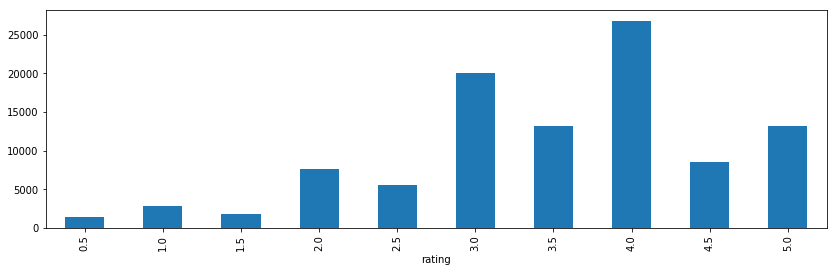

In [10]:
count_by_rank = ratings.groupby('rating').size()
count_by_rank.plot.bar(figsize=(14, 4))

In [19]:
#import sys
#!{sys.executable} -m pip install efficient_apriori

from efficient_apriori import apriori

transactions = list(ratings.groupby('userId')['movieId'].apply(list))

itemsets, rules = apriori(transactions, 
                          max_length=2,
                          min_support=0.1,
                          min_confidence=0.7)
rules

[{1} -> {356},
 {788} -> {1},
 {1307} -> {1},
 {1517} -> {1},
 {2355} -> {1},
 {3114} -> {1},
 {2} -> {356},
 {2} -> {364},
 {2} -> {480},
 {6} -> {296},
 {6} -> {356},
 {6} -> {593},
 {10} -> {110},
 {10} -> {296},
 {10} -> {356},
 {10} -> {380},
 {10} -> {480},
 {10} -> {589},
 {10} -> {592},
 {16} -> {296},
 {16} -> {356},
 {19} -> {296},
 {19} -> {344},
 {19} -> {356},
 {19} -> {367},
 {19} -> {480},
 {21} -> {110},
 {21} -> {296},
 {21} -> {318},
 {21} -> {356},
 {21} -> {380},
 {21} -> {457},
 {21} -> {480},
 {21} -> {592},
 {21} -> {593},
 {32} -> {296},
 {34} -> {296},
 {34} -> {356},
 {34} -> {480},
 {39} -> {296},
 {39} -> {356},
 {288} -> {47},
 {293} -> {47},
 {47} -> {296},
 {47} -> {318},
 {47} -> {356},
 {47} -> {593},
 {778} -> {47},
 {1089} -> {47},
 {32587} -> {47},
 {50} -> {296},
 {50} -> {318},
 {50} -> {356},
 {778} -> {50},
 {1089} -> {50},
 {1208} -> {50},
 {1213} -> {50},
 {1221} -> {50},
 {95} -> {780},
 {104} -> {356},
 {153} -> {110},
 {161} -> {110},
 {185}